In [32]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data=pd.read_csv('data/cleaned_data.csv', parse_dates=['timestamp'])
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,timestamp,valence,arousal,emotion,heart_rate,stress,respiration,body_battery,spo2,sleep_score,hrv_avg,sleep_score_tier,time_of_day
0,2025-02-24 17:32:00,0.89,0.54,Happy,54.0,10.0,15.0,45.0,94.0,89.0,106.0,Good,Afternoon
1,2025-02-24 18:12:00,0.99,0.50,Happy,73.0,22.0,11.0,45.0,95.0,89.0,106.0,Good,Afternoon
2,2025-02-24 19:04:00,0.98,0.55,Happy,81.0,-1.0,-1.0,45.0,94.0,89.0,106.0,Good,Evening
3,2025-02-25 12:12:00,0.03,-0.04,Neutral,74.0,-1.0,-1.0,100.0,96.0,88.0,87.0,Good,Morning
4,2025-02-25 12:36:00,-0.07,-0.04,Upset,110.0,-2.0,-1.0,100.0,96.0,88.0,87.0,Good,Morning


In [34]:
# Load the full dataset with all timestamps
merged_data = pd.read_csv('data/merged_data.csv', parse_dates=['timestamp'])
merged_data.set_index('timestamp', inplace=True)

lag_features = pd.DataFrame(index=merged_data.index)
lag_features['hr_1'] = merged_data['heart_rate'].shift(1)  # 2 minutes ago
lag_features['hr_2'] = merged_data['heart_rate'].shift(2)  # 4 minutes ago

lag_features.reset_index(inplace=True)

data = pd.merge(
    data,
    lag_features,
    on='timestamp',
    how='left'
)

# Display the first few rows to verify the lag features
print("First few rows with lag features:")
data.head()


First few rows with lag features:


,timestamp,valence,arousal,emotion,heart_rate,stress,respiration,body_battery,spo2,sleep_score,hrv_avg,sleep_score_tier,time_of_day,hr_1,hr_2
0,2025-02-24 17:32:00,0.89,0.54,Happy,54.0,10.0,15.0,45.0,94.0,89.0,106.0,Good,Afternoon,56.0,61.0
1,2025-02-24 18:12:00,0.99,0.50,Happy,73.0,22.0,11.0,45.0,95.0,89.0,106.0,Good,Afternoon,84.0,75.0
2,2025-02-24 19:04:00,0.98,0.55,Happy,81.0,-1.0,-1.0,45.0,94.0,89.0,106.0,Good,Evening,84.0,90.0
3,2025-02-25 12:12:00,0.03,-0.04,Neutral,74.0,-1.0,-1.0,100.0,96.0,88.0,87.0,Good,Morning,61.0,55.0
4,2025-02-25 12:36:00,-0.07,-0.04,Upset,110.0,-2.0,-1.0,100.0,96.0,88.0,87.0,Good,Morning,109.0,102.0


In [35]:
##make change in heartrate_now min and change in heart rate 2 min ago
data['hr_change_now'] = data['heart_rate'] - data['hr_1']
data['hr_change_2min'] = data['hr_2'] - data['hr_1']

data.head()

,timestamp,valence,arousal,emotion,heart_rate,stress,respiration,body_battery,spo2,sleep_score,hrv_avg,sleep_score_tier,time_of_day,hr_1,hr_2,hr_change_now,hr_change_2min
0,2025-02-24 17:32:00,0.89,0.54,Happy,54.0,10.0,15.0,45.0,94.0,89.0,106.0,Good,Afternoon,56.0,61.0,-2.0,5.0
1,2025-02-24 18:12:00,0.99,0.50,Happy,73.0,22.0,11.0,45.0,95.0,89.0,106.0,Good,Afternoon,84.0,75.0,-11.0,-9.0
2,2025-02-24 19:04:00,0.98,0.55,Happy,81.0,-1.0,-1.0,45.0,94.0,89.0,106.0,Good,Evening,84.0,90.0,-3.0,6.0
3,2025-02-25 12:12:00,0.03,-0.04,Neutral,74.0,-1.0,-1.0,100.0,96.0,88.0,87.0,Good,Morning,61.0,55.0,13.0,-6.0
4,2025-02-25 12:36:00,-0.07,-0.04,Upset,110.0,-2.0,-1.0,100.0,96.0,88.0,87.0,Good,Morning,109.0,102.0,1.0,-7.0


In [36]:
# One-hot encode sleep_score_tier and time_of_day
sleep_score_dummies = pd.get_dummies(data['sleep_score_tier'], prefix='sleep_tier')
time_of_day_dummies = pd.get_dummies(data['time_of_day'], prefix='time')

# Drop the original categorical columns
data = data.drop(['sleep_score_tier', 'time_of_day'], axis=1)

##turn into int instead of true/false
sleep_score_dummies = sleep_score_dummies.astype(int)
time_of_day_dummies = time_of_day_dummies.astype(int)

# Concatenate the one-hot encoded columns
data = pd.concat([data, sleep_score_dummies, time_of_day_dummies], axis=1)

# Display the first few rows to verify the encoding
print("First few rows with encoded categorical variables:")
data.head()

First few rows with encoded categorical variables:


,timestamp,valence,arousal,emotion,heart_rate,stress,respiration,body_battery,spo2,sleep_score,...,hr_change_now,hr_change_2min,sleep_tier_Excellent,sleep_tier_Fair,sleep_tier_Good,sleep_tier_Poor,time_Afternoon,time_Evening,time_Morning,time_Night
0,2025-02-24 17:32:00,0.89,0.54,Happy,54.0,10.0,15.0,45.0,94.0,89.0,...,-2.0,5.0,0,0,1,0,1,0,0,0
1,2025-02-24 18:12:00,0.99,0.50,Happy,73.0,22.0,11.0,45.0,95.0,89.0,...,-11.0,-9.0,0,0,1,0,1,0,0,0
2,2025-02-24 19:04:00,0.98,0.55,Happy,81.0,-1.0,-1.0,45.0,94.0,89.0,...,-3.0,6.0,0,0,1,0,0,1,0,0
3,2025-02-25 12:12:00,0.03,-0.04,Neutral,74.0,-1.0,-1.0,100.0,96.0,88.0,...,13.0,-6.0,0,0,1,0,0,0,1,0
4,2025-02-25 12:36:00,-0.07,-0.04,Upset,110.0,-2.0,-1.0,100.0,96.0,88.0,...,1.0,-7.0,0,0,1,0,0,0,1,0


In [37]:
# drop missing values
data = data.dropna()

print(data.isna().sum())


timestamp               0
valence                 0
arousal                 0
emotion                 0
heart_rate              0
stress                  0
respiration             0
body_battery            0
spo2                    0
sleep_score             0
hrv_avg                 0
hr_1                    0
hr_2                    0
hr_change_now           0
hr_change_2min          0
sleep_tier_Excellent    0
sleep_tier_Fair         0
sleep_tier_Good         0
sleep_tier_Poor         0
time_Afternoon          0
time_Evening            0
time_Morning            0
time_Night              0
dtype: int64


# MAKE DATASETS

In [38]:
def create_datasets(df):
    """Create separate datasets for valence, arousal, and emotion labels"""
    # Get physiological features
    physiological_cols = ['heart_rate', 'stress', 'respiration', 'body_battery', 'spo2', 'hrv_avg', 'sleep_score', 'hr_change_now', 'hr_change_2min']
    dummy_cols = ['time_Morning', 'time_Afternoon', 'time_Evening', 'time_Night']
    available_cols = [col for col in physiological_cols if col in df.columns]
    available_cols.extend(dummy_cols)
    
    # Create base features DataFrame
    features = df[['timestamp'] + available_cols].copy()
    
    # Create valence dataset
    valence_data = features.copy()
    valence_data['valence'] = df['valence']
    valence_data = valence_data.dropna(subset=['valence'])
    print(f"Valence dataset shape: {valence_data.shape}")
    
    # Create arousal dataset
    arousal_data = features.copy()
    arousal_data['arousal'] = df['arousal']
    arousal_data = arousal_data.dropna(subset=['arousal'])
    print(f"Arousal dataset shape: {arousal_data.shape}")
    
    # Create emotion labels dataset
    emotion_data = features.copy()
    emotion_data['emotion'] = df['emotion']
    emotion_data = emotion_data.dropna(subset=['emotion'])
    print(f"Emotion dataset shape: {emotion_data.shape}")
    
    # Save datasets
    valence_data.to_csv('data/valence_dataset.csv', index=False)
    arousal_data.to_csv('data/arousal_dataset.csv', index=False)
    emotion_data.to_csv('data/emotion_dataset.csv', index=False)
    
    # Print the head
    print(display(valence_data.head()))
    print(display(arousal_data.head()))
    print(display(emotion_data.head()))
    
    return valence_data, arousal_data, emotion_data


valence_data, arousal_data, emotion_data = create_datasets(data)

Valence dataset shape: (124, 15)
Arousal dataset shape: (124, 15)
Emotion dataset shape: (124, 15)


,timestamp,heart_rate,stress,respiration,body_battery,spo2,hrv_avg,sleep_score,hr_change_now,hr_change_2min,time_Morning,time_Afternoon,time_Evening,time_Night,valence
0,2025-02-24 17:32:00,54.0,10.0,15.0,45.0,94.0,106.0,89.0,-2.0,5.0,0,1,0,0,0.89
1,2025-02-24 18:12:00,73.0,22.0,11.0,45.0,95.0,106.0,89.0,-11.0,-9.0,0,1,0,0,0.99
2,2025-02-24 19:04:00,81.0,-1.0,-1.0,45.0,94.0,106.0,89.0,-3.0,6.0,0,0,1,0,0.98
3,2025-02-25 12:12:00,74.0,-1.0,-1.0,100.0,96.0,87.0,88.0,13.0,-6.0,1,0,0,0,0.03
4,2025-02-25 12:36:00,110.0,-2.0,-1.0,100.0,96.0,87.0,88.0,1.0,-7.0,1,0,0,0,-0.07


None


,timestamp,heart_rate,stress,respiration,body_battery,spo2,hrv_avg,sleep_score,hr_change_now,hr_change_2min,time_Morning,time_Afternoon,time_Evening,time_Night,arousal
0,2025-02-24 17:32:00,54.0,10.0,15.0,45.0,94.0,106.0,89.0,-2.0,5.0,0,1,0,0,0.54
1,2025-02-24 18:12:00,73.0,22.0,11.0,45.0,95.0,106.0,89.0,-11.0,-9.0,0,1,0,0,0.50
2,2025-02-24 19:04:00,81.0,-1.0,-1.0,45.0,94.0,106.0,89.0,-3.0,6.0,0,0,1,0,0.55
3,2025-02-25 12:12:00,74.0,-1.0,-1.0,100.0,96.0,87.0,88.0,13.0,-6.0,1,0,0,0,-0.04
4,2025-02-25 12:36:00,110.0,-2.0,-1.0,100.0,96.0,87.0,88.0,1.0,-7.0,1,0,0,0,-0.04


None


,timestamp,heart_rate,stress,respiration,body_battery,spo2,hrv_avg,sleep_score,hr_change_now,hr_change_2min,time_Morning,time_Afternoon,time_Evening,time_Night,emotion
0,2025-02-24 17:32:00,54.0,10.0,15.0,45.0,94.0,106.0,89.0,-2.0,5.0,0,1,0,0,Happy
1,2025-02-24 18:12:00,73.0,22.0,11.0,45.0,95.0,106.0,89.0,-11.0,-9.0,0,1,0,0,Happy
2,2025-02-24 19:04:00,81.0,-1.0,-1.0,45.0,94.0,106.0,89.0,-3.0,6.0,0,0,1,0,Happy
3,2025-02-25 12:12:00,74.0,-1.0,-1.0,100.0,96.0,87.0,88.0,13.0,-6.0,1,0,0,0,Neutral
4,2025-02-25 12:36:00,110.0,-2.0,-1.0,100.0,96.0,87.0,88.0,1.0,-7.0,1,0,0,0,Upset


None


## Valence

In [39]:
#Overall description of valence
# print(valence_data.info())

#Count missing values
print(valence_data.isnull().sum())


timestamp         0
heart_rate        0
stress            0
respiration       0
body_battery      0
spo2              0
hrv_avg           0
sleep_score       0
hr_change_now     0
hr_change_2min    0
time_Morning      0
time_Afternoon    0
time_Evening      0
time_Night        0
valence           0
dtype: int64


Valence Statistics:
count    124.000000
mean       0.090887
std        0.643128
min       -1.050000
25%       -0.435000
50%        0.040000
75%        0.695000
max        1.190000
Name: valence, dtype: float64


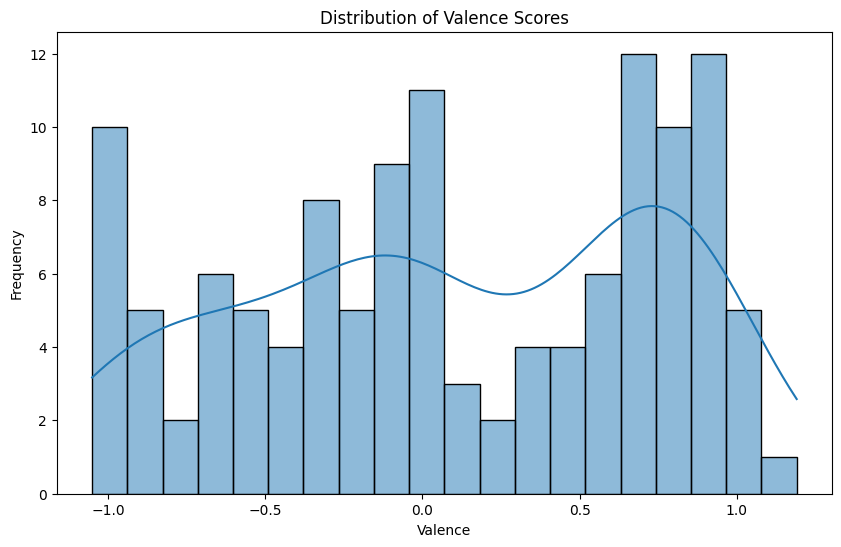

In [40]:
# Basic statistics for valence
valence_stats = valence_data['valence'].describe()
print("Valence Statistics:")
print(valence_stats)

# Plot the distribution of valence scores
plt.figure(figsize=(10, 6))
sns.histplot(data=valence_data, x='valence', bins=20, kde=True)
plt.title('Distribution of Valence Scores')
plt.xlabel('Valence')
plt.ylabel('Frequency')
plt.savefig('plots/valence_freq.png', dpi=300, bbox_inches='tight')
plt.show()


Correlations with Valence:
valence           1.000000
time_Evening      0.114754
stress            0.086379
hr_change_2min    0.076995
sleep_score       0.069915
time_Morning      0.021245
body_battery      0.017129
heart_rate        0.012696
hrv_avg          -0.033607
spo2             -0.036621
respiration      -0.050451
time_Afternoon   -0.054140
hr_change_now    -0.103309
time_Night       -0.123810
Name: valence, dtype: float64


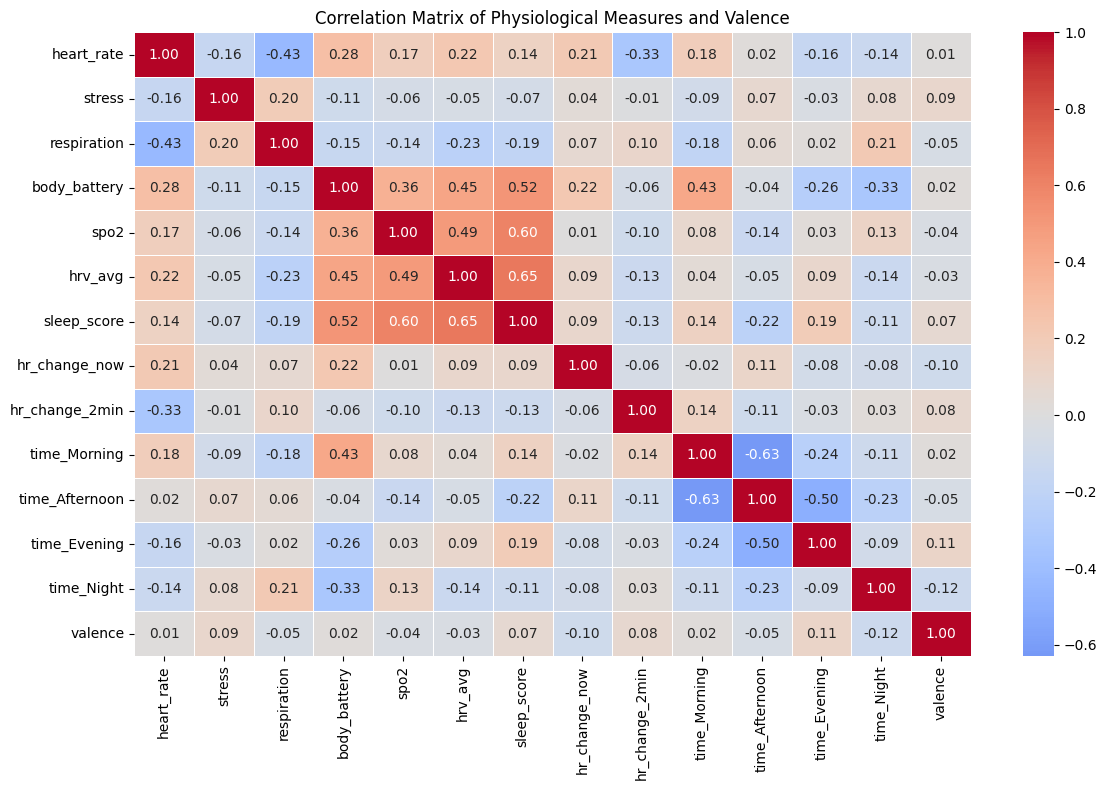

In [41]:
correlation_matrix = valence_data.drop(columns=['timestamp']).corr()
# Print correlation values with valence
print("\nCorrelations with Valence:")
print(correlation_matrix['valence'].sort_values(ascending=False))

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            linewidths=0.5)
plt.title('Correlation Matrix of Physiological Measures and Valence')
plt.tight_layout()

# Save the plot
plt.savefig('plots/valence_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
#
columns_to_drop = ['timestamp', 'hrv_avg', 'spo2', 'time_Morning', 'body_battery', 'heart_rate']

#drop columns and do correlation matrix
correlation_matrix = valence_data.drop(columns=columns_to_drop).corr()
# Print correlation values with valence
print("\nCorrelations with Valence:")
print(correlation_matrix['valence'].sort_values(ascending=False))



Correlations with Valence:
valence           1.000000
time_Evening      0.114754
stress            0.086379
hr_change_2min    0.076995
sleep_score       0.069915
respiration      -0.050451
time_Afternoon   -0.054140
hr_change_now    -0.103309
time_Night       -0.123810
Name: valence, dtype: float64


In [43]:
#save as valence_cleaned
valence_cleaned = valence_data.drop(columns=columns_to_drop)
valence_cleaned.to_csv('data/clean/valence_cleaned.csv', index=False)

## Arousal

Arousal Statistics:
count    124.000000
mean       0.236774
std        0.526468
min       -1.120000
25%       -0.052500
50%        0.430000
75%        0.640000
max        1.070000
Name: arousal, dtype: float64


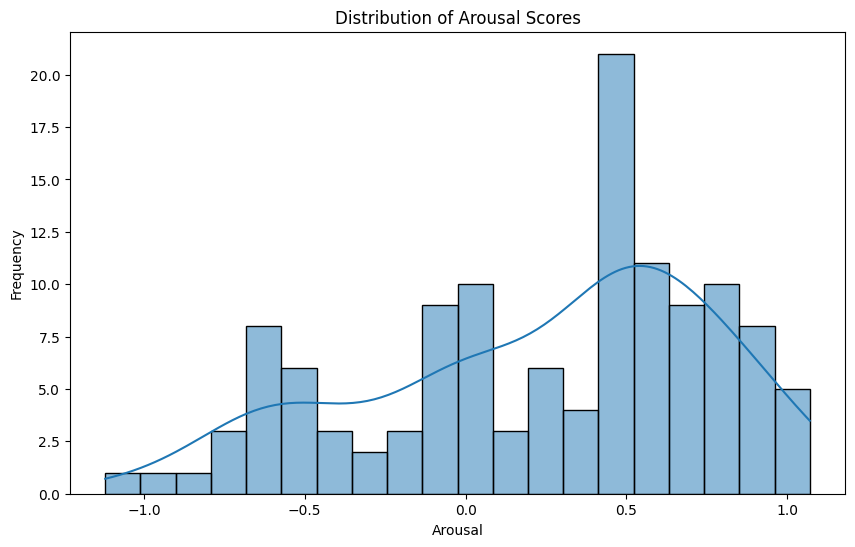

In [44]:
# Basic statistics for valence
arousal_stats = arousal_data['arousal'].describe()
print("Arousal Statistics:")
print(arousal_stats)

# Plot the distribution of valence scores
plt.figure(figsize=(10, 6))
sns.histplot(data=arousal_data, x='arousal', bins=20, kde=True)
plt.title('Distribution of Arousal Scores')
plt.xlabel('Arousal')
plt.ylabel('Frequency')
plt.savefig('plots/arousal_freq.png', dpi=300, bbox_inches='tight')
plt.show()


Correlations with Arousal:
arousal           1.000000
hr_change_now     0.268491
heart_rate        0.209801
hrv_avg           0.140973
spo2              0.135732
body_battery      0.115359
time_Afternoon    0.068114
sleep_score       0.028201
time_Evening      0.012734
stress            0.003454
time_Night       -0.047214
time_Morning     -0.068908
hr_change_2min   -0.119479
respiration      -0.144384
Name: arousal, dtype: float64


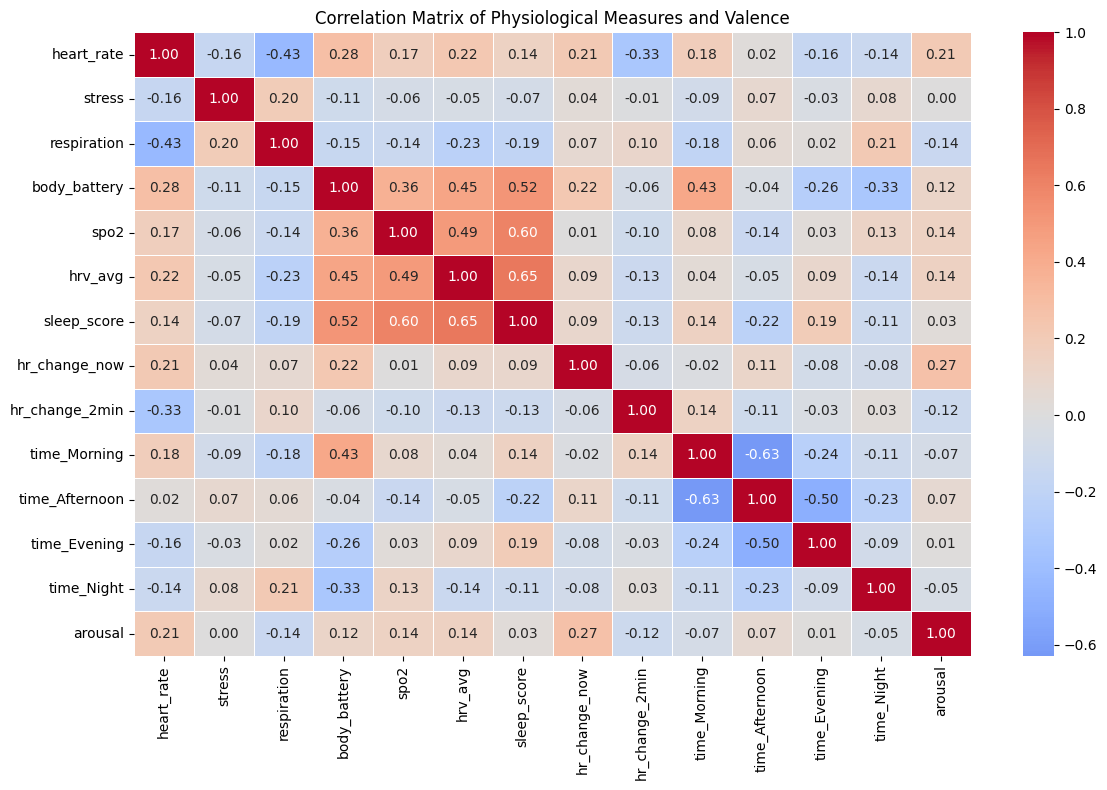

In [45]:
correlation_matrix = arousal_data.drop(columns=['timestamp']).corr()
# Print correlation values with valence
print("\nCorrelations with Arousal:")
print(correlation_matrix['arousal'].sort_values(ascending=False))

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            linewidths=0.5)
plt.title('Correlation Matrix of Physiological Measures and Valence')
plt.tight_layout()

# Save the plot
plt.savefig('plots/arousal_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [46]:
columns_to_drop = ['timestamp', 'sleep_score', 'stress', 'body_battery', 'time_Afternoon', 'time_Night']

#drop columns and do correlation matrix
correlation_matrix = arousal_data.drop(columns=columns_to_drop).corr()
# Print correlation values with valence
print("\nCorrelations with Arousal:")
print(correlation_matrix['arousal'].sort_values(ascending=False))


Correlations with Arousal:
arousal           1.000000
hr_change_now     0.268491
heart_rate        0.209801
hrv_avg           0.140973
spo2              0.135732
time_Evening      0.012734
time_Morning     -0.068908
hr_change_2min   -0.119479
respiration      -0.144384
Name: arousal, dtype: float64


In [47]:
## save as arousal_cleaned
arousal_cleaned = arousal_data.drop(columns=columns_to_drop)
arousal_cleaned.to_csv('data/clean/arousal_cleaned.csv', index=False)